# 중심을 대표하는 값

In [1]:
import numpy as np

# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [2]:
# 기하평균
from scipy.stats import hmean, gmean
gmean(data)

np.float64(26.051710846973528)

In [3]:
# 조화평균
hmean(data)

np.float64(21.8978102189781)

In [4]:
# 가중평균
# 가격과 개수
prices = [5000, 9000]
counts = [8, 2]

np.average(prices, weights = counts)

np.float64(5800.0)

# 대표값 - 중앙값

In [5]:
data

[10, 20, 30, 40, 50]

# 백분위수

In [6]:
scores = [65, 75, 80, 85, 95]
p25 = np.percentile(scores, 25) # Q1
p50 = np.percentile(scores, 50) # Q2 Median
p75 = np.percentile(scores, 75) # Q3

p25, p50, p75

(np.float64(75.0), np.float64(80.0), np.float64(85.0))

In [7]:
# IQR: 사분위범위 Q3 - Q1 = 85 - 75 = 10
p75 - p25

np.float64(10.0)

중앙값, 분위수 => 개수를 중요시하는 통계량\
이상값 / 극단적인 값이 중요하지 않음

# 대표값 - 최빈값

In [8]:
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


# 범위의 계산 => 변동성을 측정
지표 => 극단적인 값에 민감

- 최대 / 최소 2개의 값만 용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나 X 
- 실제 데이터가 어떤 값들로 구성되어 있는지를 설명할 수 없음

In [9]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


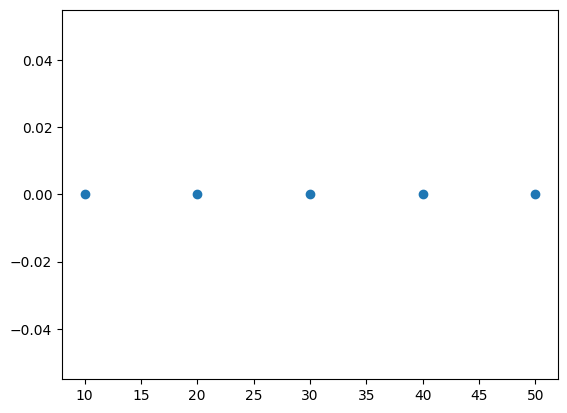

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))

In [11]:
import seaborn as sns

vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# sepal_length의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [15]:
# sepal_width 범위
vp_df['sepal_width'].max() - vp_df['sepal_width'].min()

np.float64(2.4000000000000004)

In [17]:
# petal_length의 범위
vp_df['petal_length'].max() - vp_df['petal_length'].min()

np.float64(5.9)

In [18]:
# petal_width의 범위
vp_df['petal_width'].max() - vp_df['petal_width'].min()

np.float64(2.4)

In [21]:
# 모든 속성의 범위 확인 (반복문)
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]):
        print(f'{col}의 범위:{vp_df[col].max()-vp_df[col].min()}')
    else:
        pass

sepal_length의 범위:3.6000000000000005
sepal_width의 범위:2.4000000000000004
petal_length의 범위:5.9
petal_width의 범위:2.4


변동성이 가장 큰 속성을 petal_length입니다\
petal_length와 petal_width가 sepal_length외 sepal_width보다 상대적으로 변동성이 큽니다\
모델 생성시에 다루어야하는 속성으로 볼 수 있습니다

In [23]:
# 산포도로 변동성 확인하기
# petal_legnth와 petal_width
# sepal_length와 sepal_width

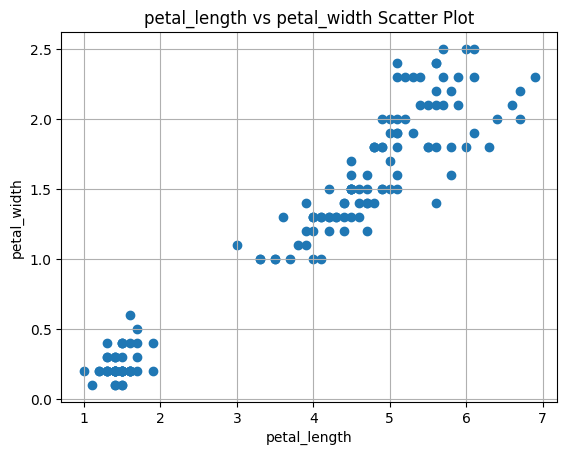

In [25]:
plt.scatter(vp_df['petal_length'], vp_df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length vs petal_width Scatter Plot')
plt.grid(True)
plt.show()

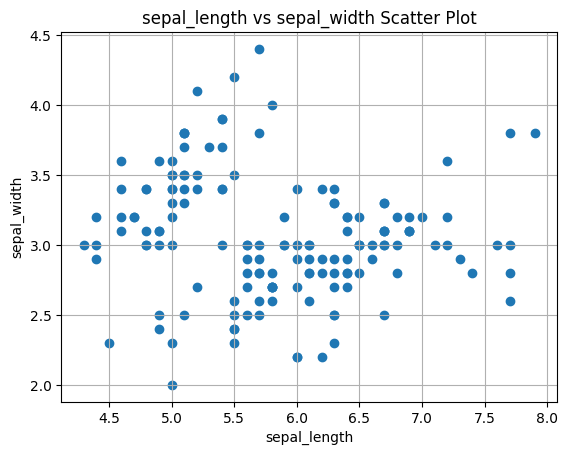

In [27]:
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width Scatter Plot')
plt.grid(True)
plt.show()

산포도를 이용해 극단적으로 다른 데이터 (이상치)가 있는지를 확인해야함

# 분산

In [28]:
data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


In [30]:
std_dev = np.std(data)
print(std_dev)  # 14.14

14.142135623730951


# 표준편차의 비교

In [31]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

In [32]:
bins = np.arange(0, 240, 10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

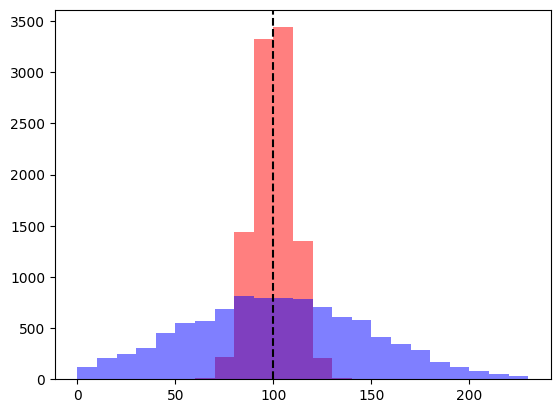

In [41]:
plt.hist(data1, bins = bins, color = 'red', alpha = 0.5)
plt.hist(data2, bins = bins, color = 'blue', alpha = 0.5)

# 평균선 표시
plt.axvline(mu, color = 'black', linestyle = '--')

In [ ]:
plt.hist(data1, bins = bins, color = 'red', alpha = 0.5)

# 평균선 표시
plt.axvline(mu, color = 'black', linestyle = '--')

In [ ]:
# iris dataset의 속성들의 표준편차 비교분석


C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1570208395.py:31: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1570208395.py:31: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


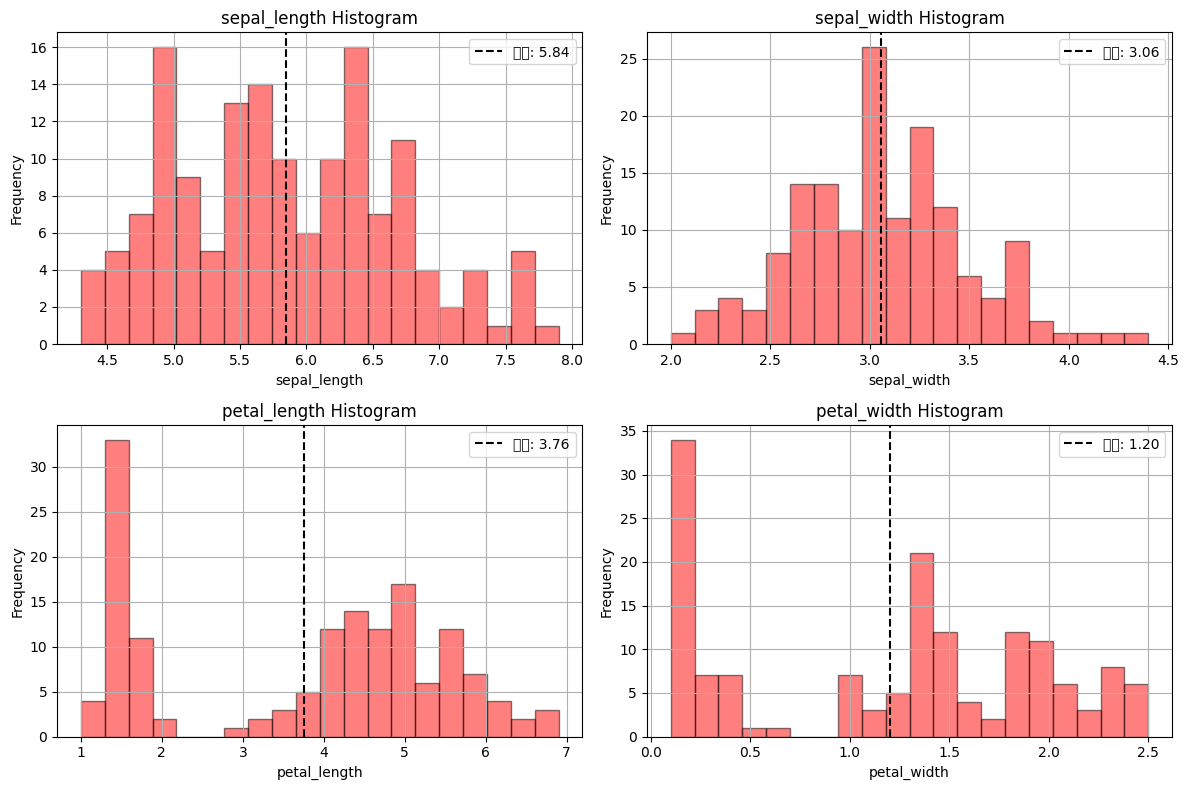

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# 숫자형 컬럼만 선택
numeric_columns = vp_df.select_dtypes(include=['number']).columns
num_columns = len(numeric_columns)
num_rows = int(np.ceil(num_columns / 2))  # 2개씩 옆으로

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    data = vp_df[column]
    mu = data.mean()
    std = data.std()
    bins = 20

    ax = axes[i]
    ax.hist(data, bins=bins, color='red', alpha=0.5, edgecolor='black')
    ax.axvline(mu, color='black', linestyle='--', label=f'평균: {mu:.2f}')
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

# 남는 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


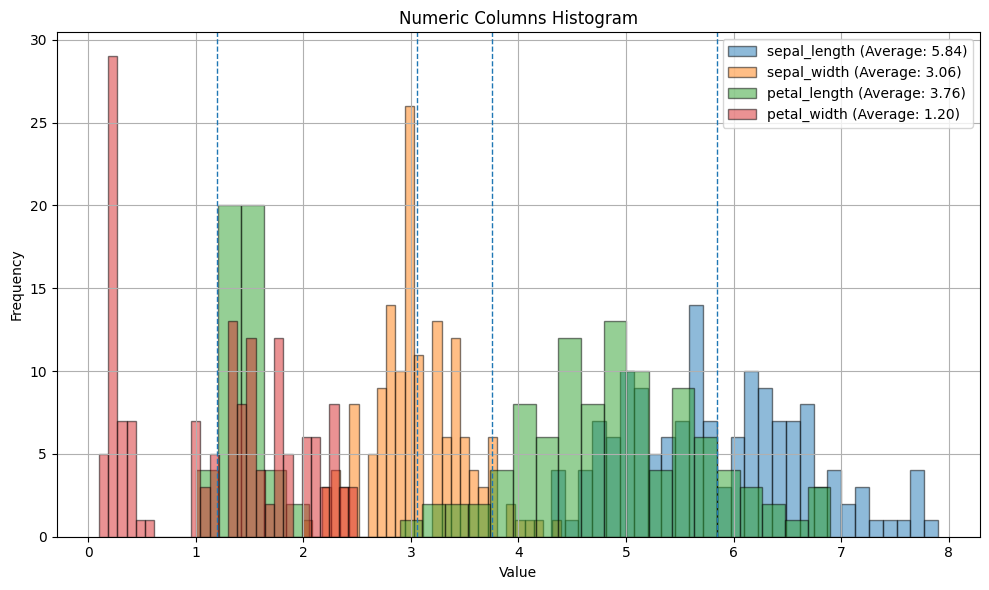

In [56]:
# 숫자형 컬럼만 선택
numeric_columns = vp_df.select_dtypes(include='number').columns

# 히스토그램 한 그래프에 겹쳐 그리기
plt.figure(figsize=(10, 6))
bins = 28

for column in numeric_columns:
    data = vp_df[column]
    mu = data.mean()
    plt.hist(data, bins=bins, alpha=0.5, label=f'{column} (Average: {mu:.2f})', edgecolor='black')
    plt.axvline(mu, linestyle='--', linewidth=1)

plt.title('Numeric Columns Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 사분위범위

In [60]:
numeric_df = vp_df.select_dtypes(include = ['float64', 'int'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

summ = pd.DataFrame({'Q1': Q1, 'Q3': Q3, 'IQR': IQR})

summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수: petal_length\
가장 분산이 작은 변수: sepal_width\
품종을 분류할 때, peal_length가 민감하게 작용 => 식별력이 큼

** IQR의 크기 => 이상치의 허용범위가 큼

# 분포의 모양, 형태

- 모양이 정규분포인지
- 치우쳐져 있는지 (좌 / 우, 위 / 아래)
- 특이한 패턴이 있는지 (쌍봉)

# 빈도분포표

In [61]:
import pandas as pd
import numpy as np

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태: 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도
- 이상치 유무

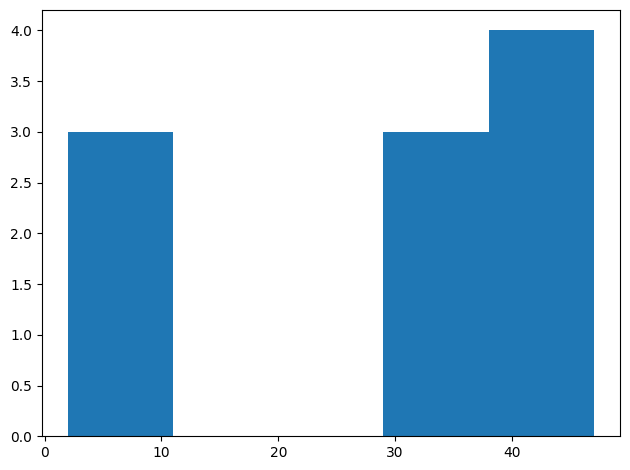

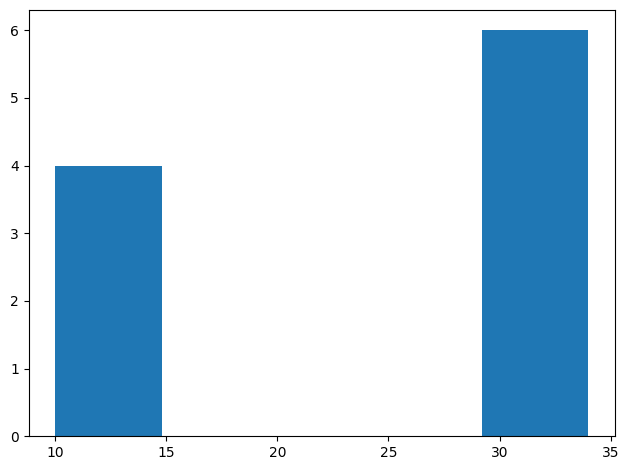

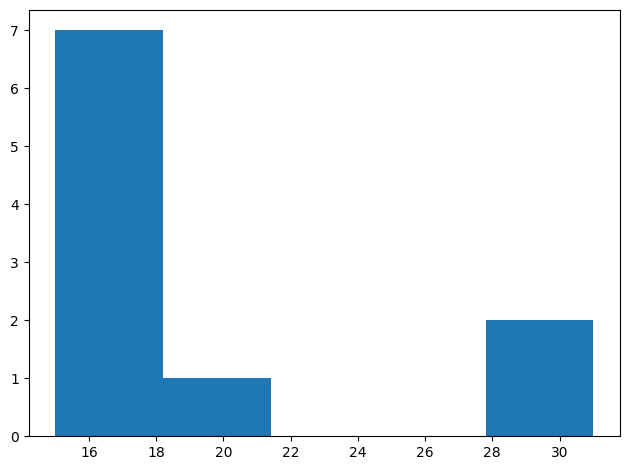

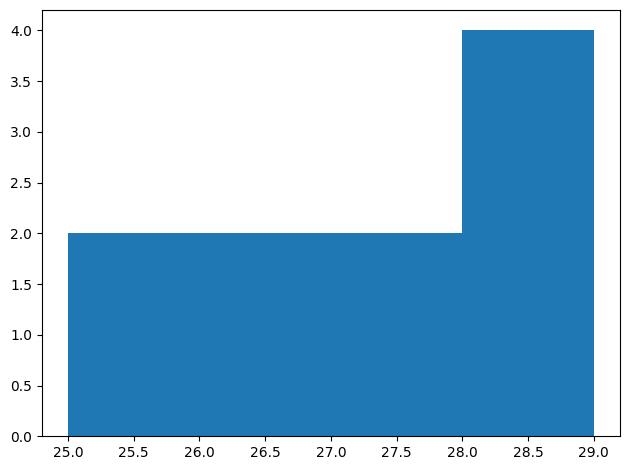

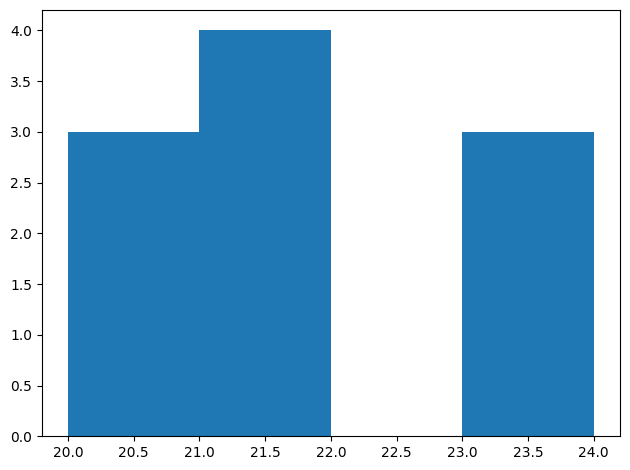

In [64]:
# 각 속성별로 히스토그램
for col in df.columns:
    plt.hist(df[col], bins = 'sturges')
    plt.tight_layout()
    plt.show()
    

In [65]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


0: 정규분포\
양수첨도: 정규분포보다 뾰족 => 꼬리가 두꺼움 (길다)\
음수첨도: 정규분포보다 눌려있음 => 꼬리가 얇음 (짧다) => 데이터가 평균 주변에 고르게 있음

In [ ]:
# iris data로 첨도의 계산

C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 52392 (\N{HANGUL SYLLABLE CEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_5072\1673881705.py:41: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from fon

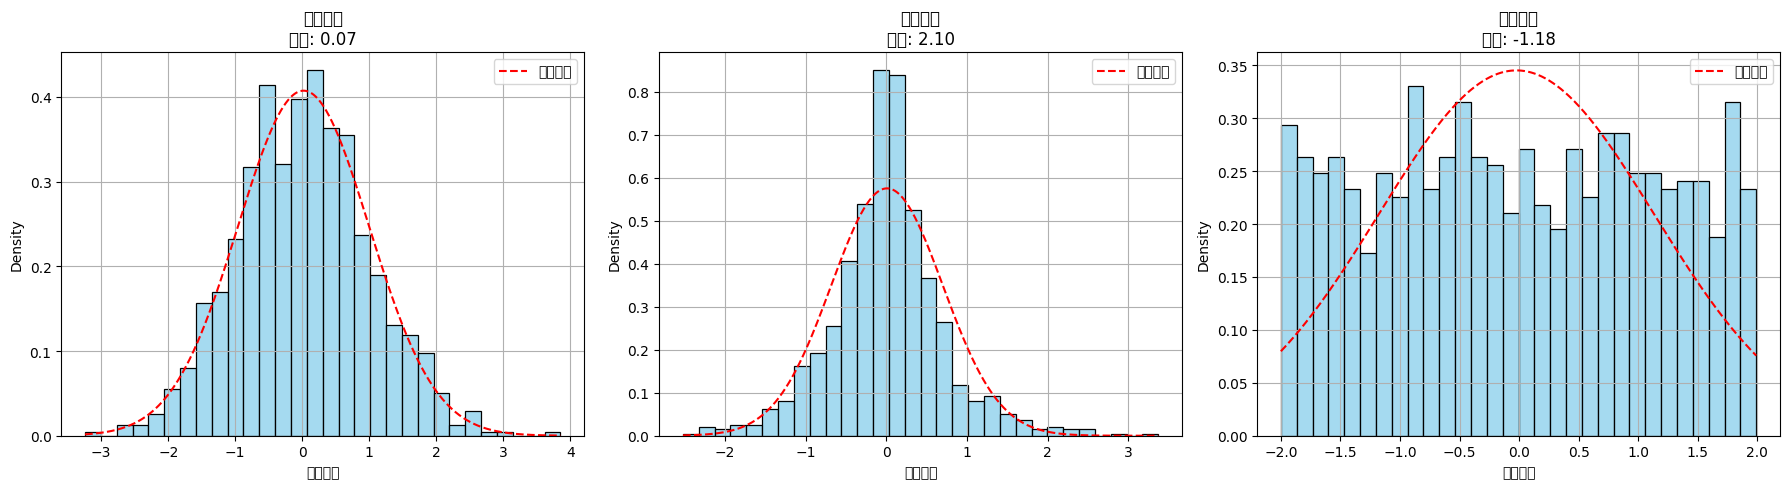

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, kurtosis

# 예시 데이터 생성
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000)
positive_kurtosis_data = np.random.laplace(loc=0, scale=0.5, size=1000)
negative_kurtosis_data = np.random.uniform(low=-2, high=2, size=1000)

# 데이터프레임 생성
df = pd.DataFrame({
    '정규분포': normal_data,
    '양수첨도': positive_kurtosis_data,
    '음수첨도': negative_kurtosis_data
})

# 히스토그램 + 정규분포 비교 그래프
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, column in zip(axes, df.columns):
    data = df[column]
    mu = data.mean()
    std = data.std()
    
    # 히스토그램
    sns.histplot(data, bins=30, kde=False, stat="density", color='skyblue', edgecolor='black', ax=ax)
    
    # 정규분포 곡선
    x = np.linspace(data.min(), data.max(), 1000)
    ax.plot(x, norm.pdf(x, mu, std), color='red', linestyle='--', label='정규분포')
    
    # 첨도 계산 및 제목에 표시
    k = kurtosis(data, fisher=True)
    ax.set_title(f"{column}\n첨도: {k:.2f}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
양의 첨도 > 3, 정규분포보다 뽀족하고 꼬리가 두꺼워서 극단적인 값이 더 많음
음의 첨도 < 3, 정규분포보다 평평하고 꼬리가 얇아서 극단적인 값이 덜 발생

In [67]:
from scipy.stats import skew

data = [10, 20, 30, 40, 100]  # 오른쪽으로 치우친 데이터
skew_value = skew(data)
print(skew_value)  # 양수 (오른쪽 꼬리)

1.1384199576606167
